<a href="https://colab.research.google.com/github/mohammadfaizan76692/AP_assignment/blob/main/pytorchNeuralnetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch

In [1]:
import torch

In [3]:
x = torch.Tensor([5,3])
y = torch.Tensor([3,4])
print(x*y)

tensor([15., 12.])


In [4]:
z = torch.zeros([2,2])
print(z)

tensor([[0., 0.],
        [0., 0.]])


In [5]:
z.shape

torch.Size([2, 2])

In [6]:
y = torch.rand([2,4])

In [7]:
print(y)

tensor([[0.8125, 0.2825, 0.8362, 0.9198],
        [0.6116, 0.0683, 0.3277, 0.1112]])


## **Reshaping in pytorch by function view**

In [8]:
y.view([1,8])

tensor([[0.8125, 0.2825, 0.8362, 0.9198, 0.6116, 0.0683, 0.3277, 0.1112]])

In [9]:
y

tensor([[0.8125, 0.2825, 0.8362, 0.9198],
        [0.6116, 0.0683, 0.3277, 0.1112]])

In [10]:
y = y.view([1,8])

# DeepLearning And Neural Networks with pytorch

In [13]:
import torch
import torchvision
from torchvision import transforms, datasets

In [55]:
train = datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [56]:
trainset = torch.utils.data.DataLoader(train,batch_size=10, shuffle =True) 
testset = torch.utils.data.DataLoader(test,batch_size=10, shuffle =True) 

In [57]:
for data in trainset:
    print(data)
    break


[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [58]:
x,y = data[0][0],data[1][0]

<function matplotlib.pyplot.show(*args, **kw)>

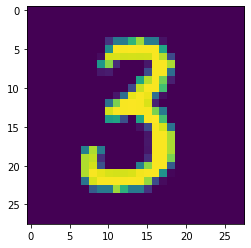

In [59]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show

In [60]:
data[0][0].shape

torch.Size([1, 28, 28])

# We want balaced data set 
# balanced = each class have good amount of samples

In [61]:
total = 0;
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
    Xs,ys  = data
    for y in ys:
      counter_dict[int(y)] +=1
      total+=1

print(counter_dict)


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [62]:
for i in counter_dict:
    print(i,": ",(counter_dict[i]/total)*100)

0 :  9.871666666666666
1 :  11.236666666666666
2 :  9.93
3 :  10.218333333333334
4 :  9.736666666666666
5 :  9.035
6 :  9.863333333333333
7 :  10.441666666666666
8 :  9.751666666666667
9 :  9.915000000000001


# Building Neural Network

In [63]:
import torch.nn as nn
import torch.nn.functional as F

In [64]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28,64)
    self.fc2 = nn.Linear(64,64)
    self.fc3 = nn.Linear(64,64)
    self.fc4 = nn.Linear(64,10)

  def forward(self,x):
    x = F.relu(self.fc1(x)) 
    x = F.relu(self.fc2(x)) 
    x = F.relu(self.fc3(x)) 
    x = self.fc4(x)
    return F.log_softmax(x,dim=1)




net = Net()
print(net)    
     
    



Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [65]:
X=torch.rand((28,28))
X = X.view(-1,28*28)

In [66]:
output=net(X)

In [67]:
output

tensor([[-2.3525, -2.3031, -2.2873, -2.2938, -2.1571, -2.3692, -2.3321, -2.2613,
         -2.3913, -2.2979]], grad_fn=<LogSoftmaxBackward0>)

In [68]:
list =[1,2,3,4]
for i in range(3):
    for data in list:
      y = data
      print(y)
      break;

1
1
1


In [69]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr = 0.001)

epochs = 5;
for epoch in range(epochs):
    for data in trainset:
        X,y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y) #it is loss function
        loss.backward()
        optimizer.step()
    print(loss)    

tensor(0.0607, grad_fn=<NllLossBackward0>)
tensor(0.0074, grad_fn=<NllLossBackward0>)
tensor(0.4219, grad_fn=<NllLossBackward0>)
tensor(0.4734, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)


In [70]:
correct=0
total= 0

with torch.no_grad():
  for data in testset:
    X,y = data
    output = net(X.view(-1,784))
    for idx , i in enumerate(output):
        if torch.argmax(i) == y[idx]:
            correct+=1
        total+=1


print("Accuracy: ",round(correct/total,3))


Accuracy:  0.972


<function matplotlib.pyplot.show(*args, **kw)>

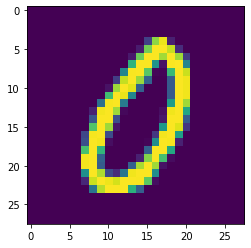

In [80]:
import matplotlib.pyplot as plt
plt.imshow(X[8].view(28,28))
plt.show

In [81]:
print(torch.argmax(net(X[8].view(-1,784))))

tensor(0)
